In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from pylab import rcParams

You are an analyst in the RST soft drink company and you are expected to forecast the sales of the production of the soft drink for the upcoming 12 months from where the data ends. The data for the production of soft drink has been given to you from January 1980 to July 1995.

**Read the data as an appropriate Time Series data and plot the data.**

In [2]:
df_1 = pd.read_csv("SoftDrink.csv")

In [3]:
df_1.shape

(187, 2)

In [4]:
df_1.head()

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [5]:
df_1.tail()

YearMonth  SoftDrinkProduction
182   1995-03                 4067
183   1995-04                 4022
184   1995-05                 3937
185   1995-06                 4365
186   1995-07                 4290

In [6]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [7]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_1.head()

YearMonth  SoftDrinkProduction Time_Stamp
0   1980-01                 1954 1980-01-31
1   1980-02                 2302 1980-02-29
2   1980-03                 3054 1980-03-31
3   1980-04                 2414 1980-04-30
4   1980-05                 2226 1980-05-31

In [8]:
df_1.tail()

YearMonth  SoftDrinkProduction Time_Stamp
182   1995-03                 4067 1995-03-31
183   1995-04                 4022 1995-04-30
184   1995-05                 3937 1995-05-31
185   1995-06                 4365 1995-06-30
186   1995-07                 4290 1995-07-31

In [9]:
df_1['Time_Stamp'] = pd.to_datetime(df_1['Time_Stamp'])
df = df_1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

Now we have our data ready for time series analysis.

**Will begin with Plotting  the Time Series to understand the behaviour of the data**

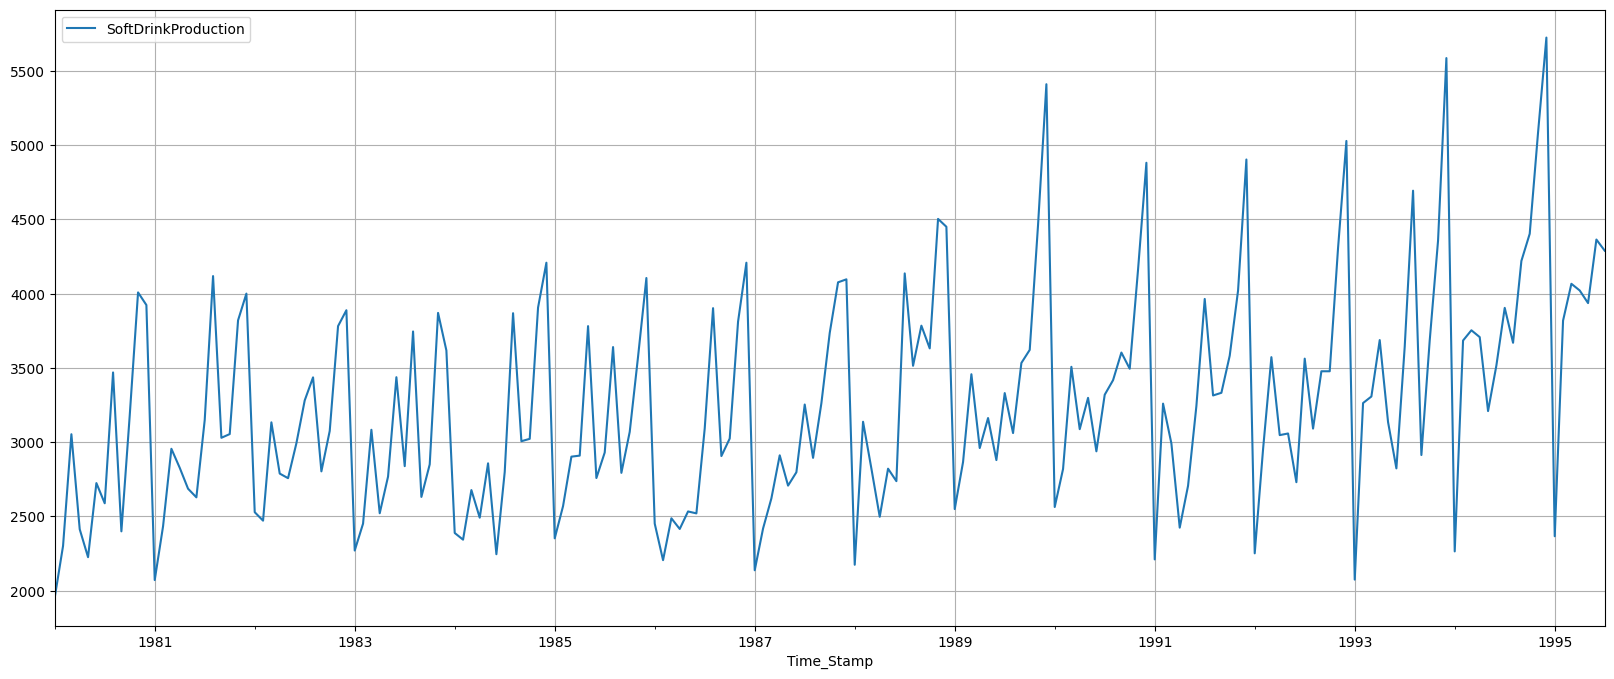

In [10]:
df.plot(figsize=(20,8))
plt.grid();

Checking the basic measures of descriptive statistics of the Time Series

In [11]:
df.describe().round(2).T

count     mean     std     min     25%     50%     75%  \
SoftDrinkProduction  187.0  3262.61  728.36  1954.0  2748.0  3134.0  3741.0   

                        max  
SoftDrinkProduction  5725.0

Total count 187, mean 3262.61 min at 1954 and max 5725

**Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

Ploting a year on year boxplot for the Soft drink production.

In [12]:
df.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='Time_Stamp', length=187)

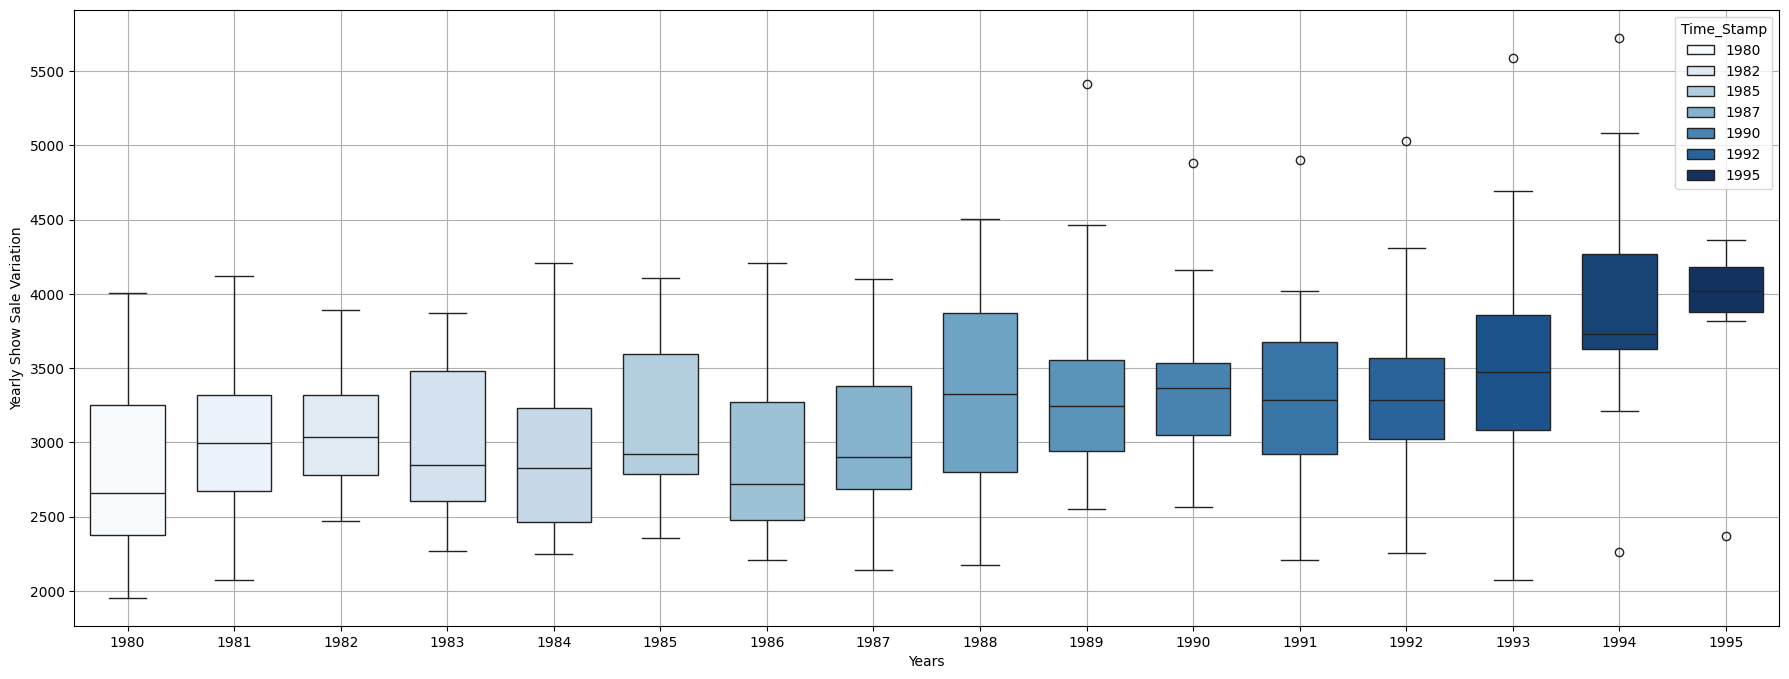

In [13]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x =df.index.year, y=df['SoftDrinkProduction'], data=df,hue= df.index.year, width= 0.7, palette='Blues', ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Show Sale Variation');

As per the the above yearly plot, year 1994 has highest production followed by 1993,1990 & 1988. 1980, 1883 & 1985 being the lowest.

Let's do a  monthly boxplot analysis of production across years.

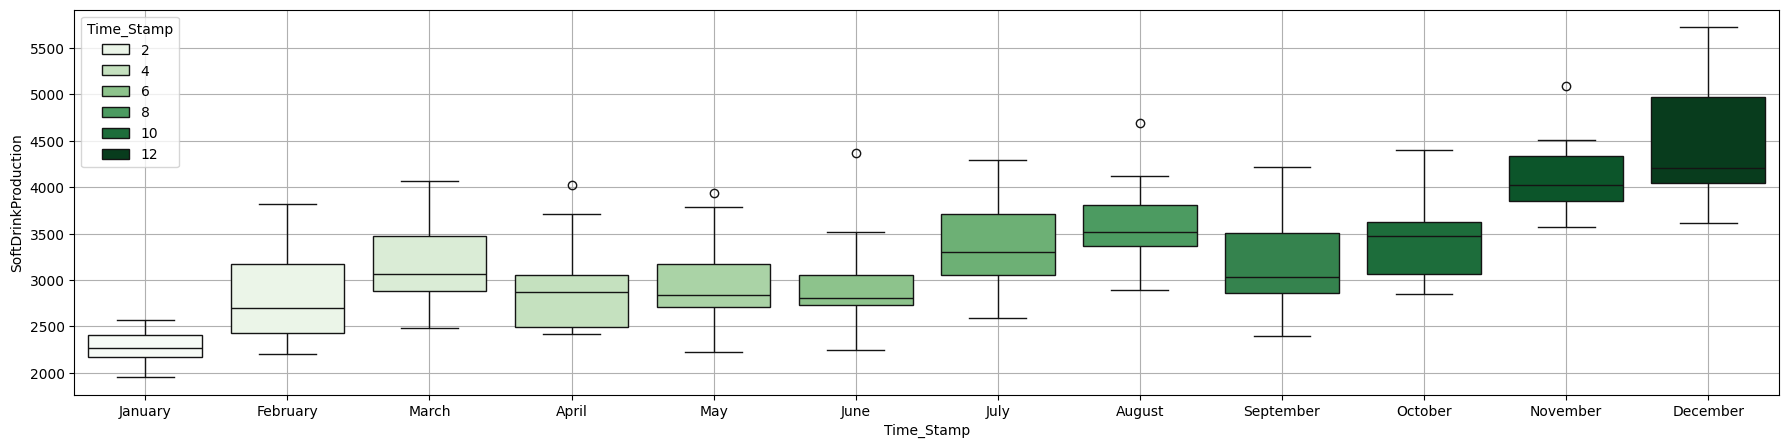

In [14]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x =df.index.month_name(), y=df['SoftDrinkProduction'], data=df,hue=df.index.month, palette='Greens',  ax=ax,whis=1.5)
plt.grid();

DEC month looks hiher in production, this could be because of festive season.

**Plot a graph of monthly sales across years.**

In [15]:
monthly_sales_across_years = pd.pivot_table(df, values = 'SoftDrinkProduction', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        2414.0  3470.0    3924.0    2302.0   1954.0  2589.0  2725.0   
1981        2828.0  4119.0    4001.0    2434.0   2072.0  3150.0  2629.0   
1982        2789.0  3437.0    3889.0    2472.0   2529.0  3282.0  2993.0   
1983        2522.0  3746.0    3618.0    2452.0   2271.0  2839.0  3438.0   
1984        2492.0  3869.0    4209.0    2344.0   2389.0  2800.0  2246.0   
1985        2910.0  3641.0    4106.0    2570.0   2353.0  2931.0  2759.0   
1986        2416.0  3903.0    4209.0    2206.0   2452.0  3093.0  2521.0   
1987        2912.0  2895.0    4097.0    2419.0   2138.0  3254.0  2798.0   
1988        2498.0  3515.0    4451.0    3138.0   2175.0  4137.0  2738.0   
1989        2961.0  3062.0    5411.0    2867.0   2550.0  3331.0  2880.0   
1990        3088.0  3418.0    4882.0    2820.0   2564.0  3320.0  2939.0   
1991        2425.0  3315.0    4904.0    3260.0   2211.0  3965.0  3244.0   
1992        3048.0  3092.0    5029.0    2952.0   2252.0  3563.0  2731.0   
1993        3688.0  4694.0    5587.0    3264.0   2075.0  3644.0  2824.0   
1994        3708.0  3670.0    5725.0    3685.0   2265.0  3905.0  3517.0   
1995        4022.0     NaN       NaN    3819.0   2367.0  4290.0  4365.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        3054.0  2226.0    4009.0   3180.0     2400.0  
1981        2956.0  2687.0    3821.0   3055.0     3030.0  
1982        3134.0  2758.0    3782.0   3076.0     2804.0  
1983        3084.0  2769.0    3871.0   2851.0     2632.0  
1984        2678.0  2858.0    3907.0   3023.0     3007.0  
1985        2903.0  3782.0    3576.0   3070.0     2794.0  
1986        2488.0  2534.0    3812.0   3025.0     2907.0  
1987        2622.0  2708.0    4077.0   3736.0     3263.0  
1988        2823.0  2822.0    4504.0   3632.0     3785.0  
1989        3458.0  3163.0    4464.0   3622.0     3534.0  
1990        3508.0  3299.0    4163.0   3495.0     3604.0  
1991        2992.0  2707.0    4021.0   3583.0     3333.0  
1992        3573.0  3059.0    4308.0   3478.0     3478.0  
1993        3308.0  3136.0    4358.0   3686.0     2914.0  
1994        3754.0  3210.0    5086.0   4404.0     4221.0  
1995        4067.0  3937.0       NaN      NaN        NaN

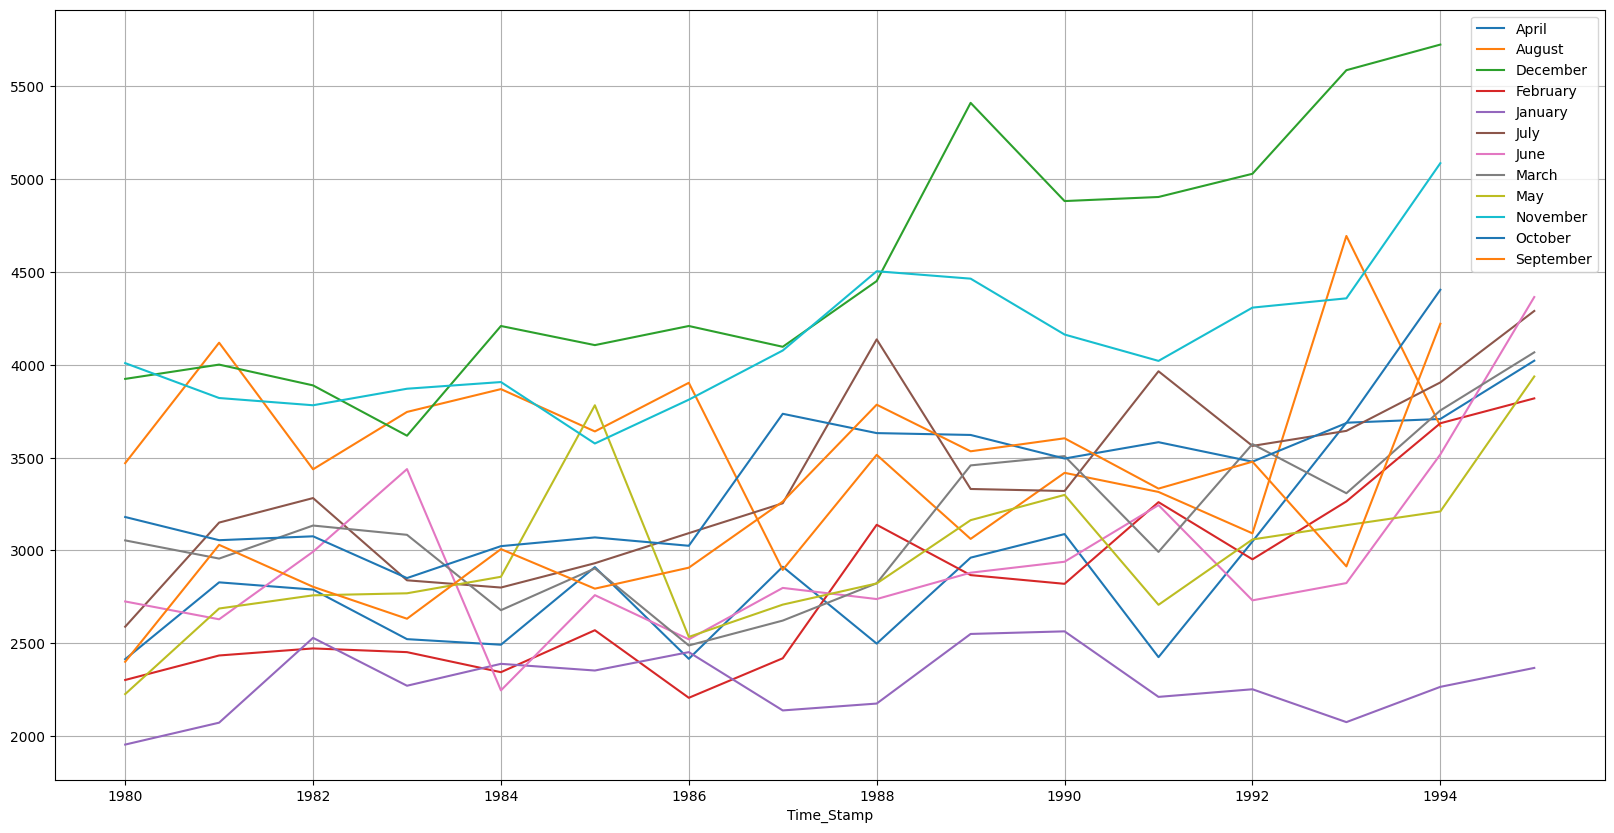

In [16]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

The above plot also confirm about DEC production being high.

### Decompose the Time Series

**Additive Model**

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

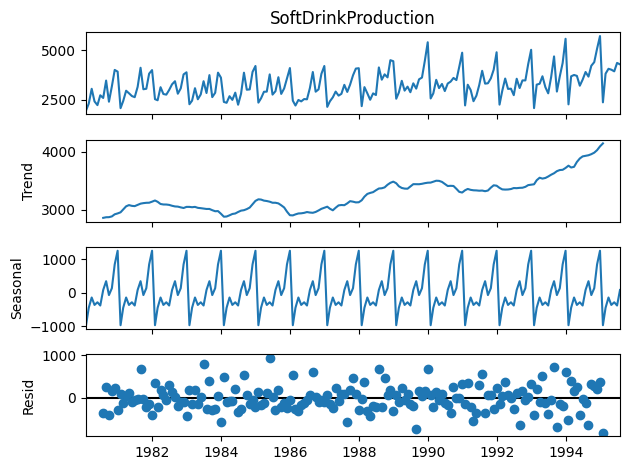

In [18]:
decomposition = seasonal_decompose(df['SoftDrinkProduction'],model='additive')
decomposition.plot();

upward trend can be noticed across years with slight drop, also we have the seasonality present in the data. Residuals are random it seems.

**Multiplicative Model**

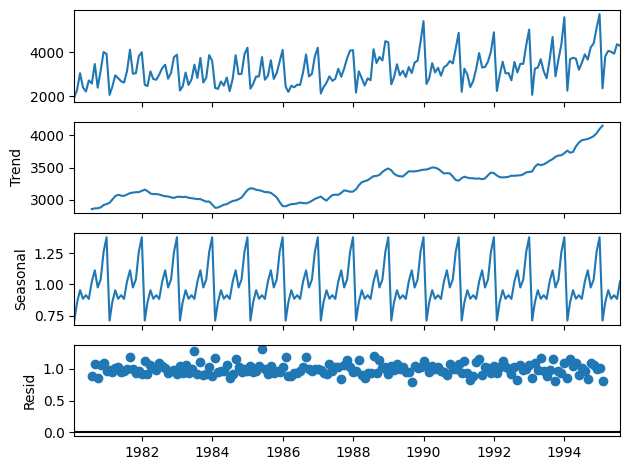

In [19]:
Decomposition1 = seasonal_decompose(df,model='multiplicative')
Decomposition1.plot();

The seasonality increases or decreases over time. It is proportionate to the trend.

**Split the data into training and test. The test data should start in 1991.**

In [20]:
train = df['1980-01-01':'1990-12-31']
test  = df['1991-01-01':'1995-07-31']

In [21]:
df.shape

(187, 1)

In [22]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [23]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226 

Last few rows of Training Data 
             SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882 

First few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707 

Last few rows of Test Data 
             SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995

**Plotting the train and test data..**

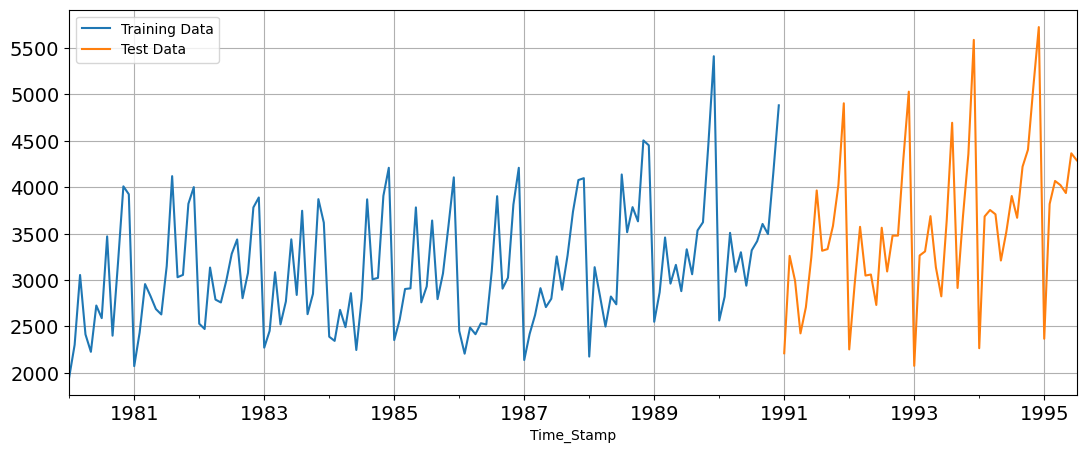

In [24]:
train['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
test['SoftDrinkProduction'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

**Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.**

Other models such as regression, naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

**Model 1:Linear Regression**

In linear regression, we are going to regress the 'SoftDrinkProduction' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [25]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


As we have successfully generated the numerical time instance order for both the training and test set. we will now add these values in the training and test set.

In [26]:
#making linear regression train and test data and copy the train, test data in it
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [27]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1980-01-31                 1954     1
1980-02-29                 2302     2
1980-03-31                 3054     3
1980-04-30                 2414     4
1980-05-31                 2226     5 

Last few rows of Training Data 
             SoftDrinkProduction  time
Time_Stamp                           
1990-08-31                 3418   128
1990-09-30                 3604   129
1990-10-31                 3495   130
1990-11-30                 4163   131
1990-12-31                 4882   132 

First few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                           
1991-01-31                 2211   133
1991-02-28                 3260   134
1991-03-31                 2992   135
1991-04-30                 2425   136
1991-05-31                 2707   137 

Last few rows of Test Data 
             SoftDrinkProduction  time
Time_Stamp                      

Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [28]:
#importing the liabrary
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

**Fitting the model into train dataset**

In [30]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

**Making the predictions on test data**

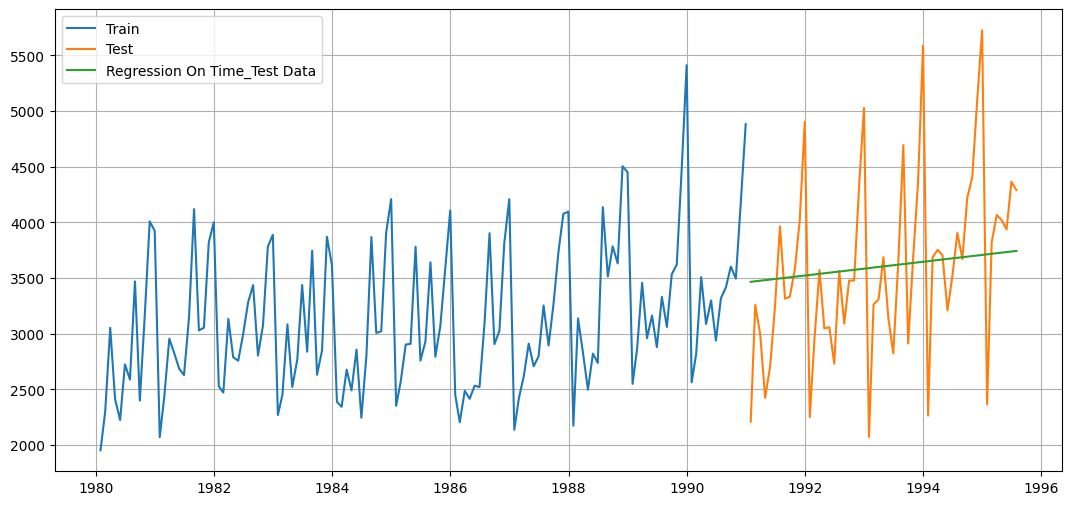

In [31]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

*Regression Model did not predict well on test data, will evalaute the model with accurancy and RMSE.*

### Defining the accuracy metrics.

**Regression Model Evaluation**

In [32]:
from sklearn import metrics

In [33]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.81


In [34]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  775.80781

RMSE for Regression model is = 775.80

**Model2:** Naive Approach(NA): yt+1 =Yt

Naïve model is built based on last level of train data, it doesn’t capture the trend and seasonality.

In [35]:
#making model on copied data
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [36]:
NaiveModel_test['naive']= np.asanyarray(train['SoftDrinkProduction'])[len(np.asanyarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    4882
1991-02-28    4882
1991-03-31    4882
1991-04-30    4882
1991-05-31    4882
Name: naive, dtype: int64

*Let us make prediction on test data and plot it.*

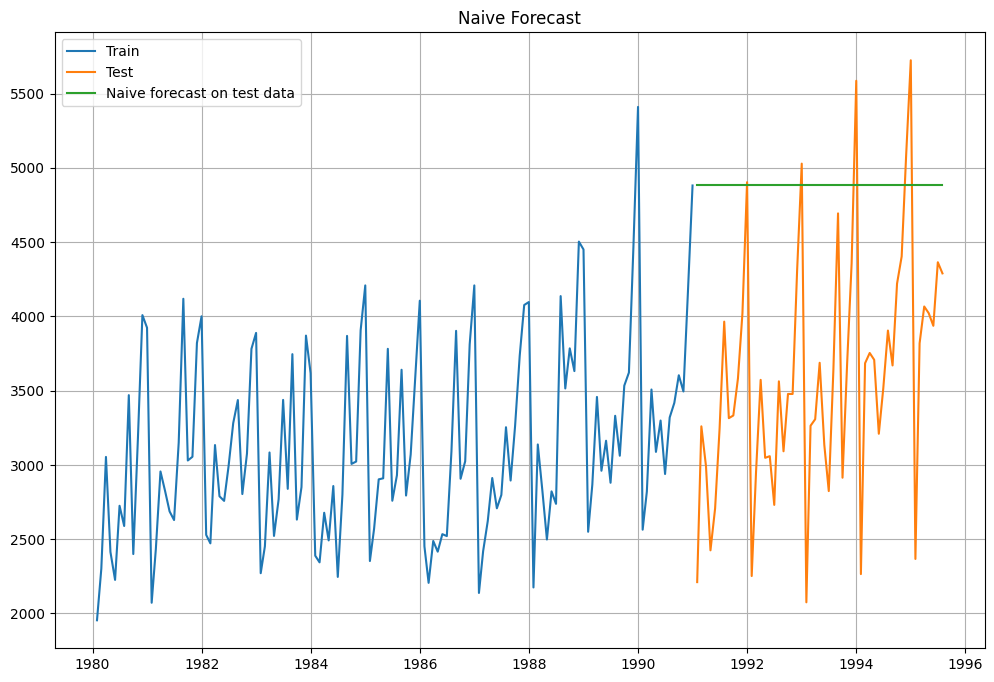

In [37]:
#Lets plot the model
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label= 'Test')
plt.plot(NaiveModel_test['naive'], label= 'Naive forecast on test data')
plt.legend(loc='best')
plt.title ('Naive Forecast')
plt.grid();

Did not get it right again, lets evaluate the model performance on other parameters.

In [38]:
#test data - RMSE
rmse_model2_test= metrics.mean_squared_error(test['SoftDrinkProduction'], NaiveModel_test['naive'],squared=False)
print('for Naive model forecast on the test data, RMSE is %3.3f'%(rmse_model2_test))

for Naive model forecast on the test data, RMSE is 1519.259


In [39]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime   775.807810
NaiveModel        1519.259233

RMSE for Naive model has gone up.

**Model3:** Simple Average Model

For simple average model, we will be using the average of the traning data values and making prediction for the future on that basis.

In [40]:
#build the model
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

Building the model and make prediction.

In [41]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

SoftDrinkProduction  mean_forecast
Time_Stamp                                    
1991-01-31                 2211    3124.166667
1991-02-28                 3260    3124.166667
1991-03-31                 2992    3124.166667
1991-04-30                 2425    3124.166667
1991-05-31                 2707    3124.166667

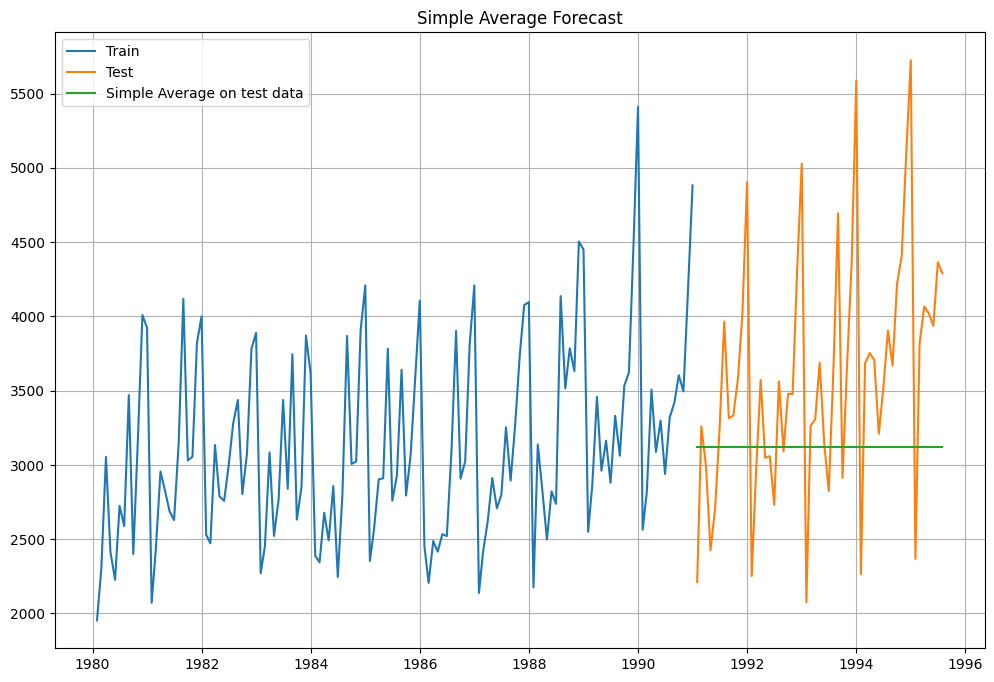

In [42]:
#Lets plot the model
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label= 'Test')
plt.plot(SimpleAverage_test['mean_forecast'], label= 'Simple Average on test data')
plt.legend(loc='best')
plt.title ('Simple Average Forecast')
plt.grid();

Not up to the mark, lets check other parameters.

**Model Evaluation**

In [43]:
#test data - RMSE
rmse_model3_test= metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print('for Simple Average model forecast on the test data, RMSE is %3.3f'%(rmse_model3_test))

for Simple Average model forecast on the test data, RMSE is 934.353


In [44]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime     775.807810
NaiveModel          1519.259233
SimpleAverageModel   934.353358

RMSE ihas got better in comparison to Naive but still below then regression model.

**Model 4:** Moving Average(MA)

Moving average models method will calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

MA model will be done using overall data.

In [45]:
MovingAverage = df.copy()
MovingAverage.head()

SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

In [46]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

SoftDrinkProduction  Trailing_2  Trailing_4  Trailing_6  \
Time_Stamp                                                            
1980-01-31                 1954         NaN         NaN         NaN   
1980-02-29                 2302      2128.0         NaN         NaN   
1980-03-31                 3054      2678.0         NaN         NaN   
1980-04-30                 2414      2734.0      2431.0         NaN   
1980-05-31                 2226      2320.0      2499.0         NaN   

            Trailing_9  
Time_Stamp              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

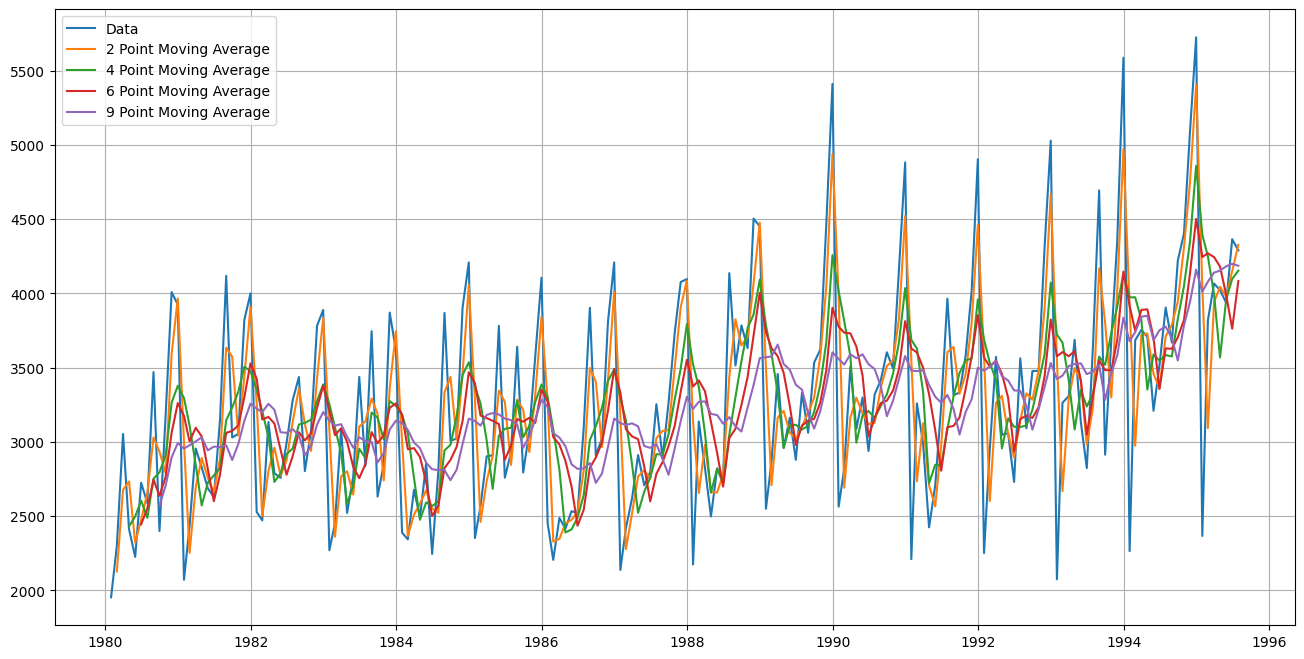

In [47]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['SoftDrinkProduction'], label='Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

2 points MA seems to have performed better, on full data.

Will make the analysis on train and test set now.


In [48]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage['1980-01-01':'1990-12-31']
trailing_MovingAverage_test=MovingAverage['1991-01-01':'1995-07-31']

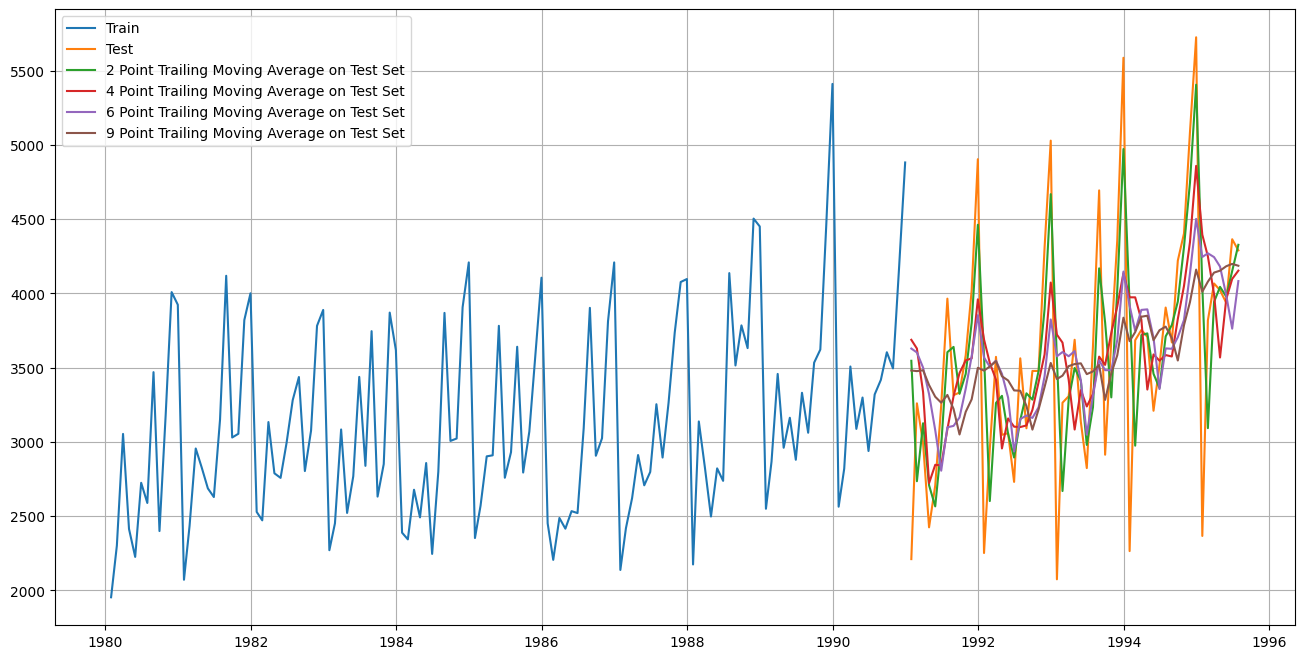

In [49]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')

#plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
#plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Once again the 2 point trailing MA model looks better among all on both test and train data set.

Let us make further analysis.

**Model Evaluation on test data**

In [52]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 735.890 


In [53]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime              775.807810
NaiveModel                   1519.259233
SimpleAverageModel            934.353358
2pointTrailingMovingAverage   556.725418
4pointTrailingMovingAverage   687.181726
6pointTrailingMovingAverage   710.513877
9pointTrailingMovingAverage   735.889827
2pointTrailingMovingAverage   556.725418
4pointTrailingMovingAverage   687.181726
6pointTrailingMovingAverage   710.513877
9pointTrailingMovingAverage   735.889827

All models in MA have given lower RMSE & 2 points being the lowest at 556.72

let us plot all the models with appropriate RMSE and compare.

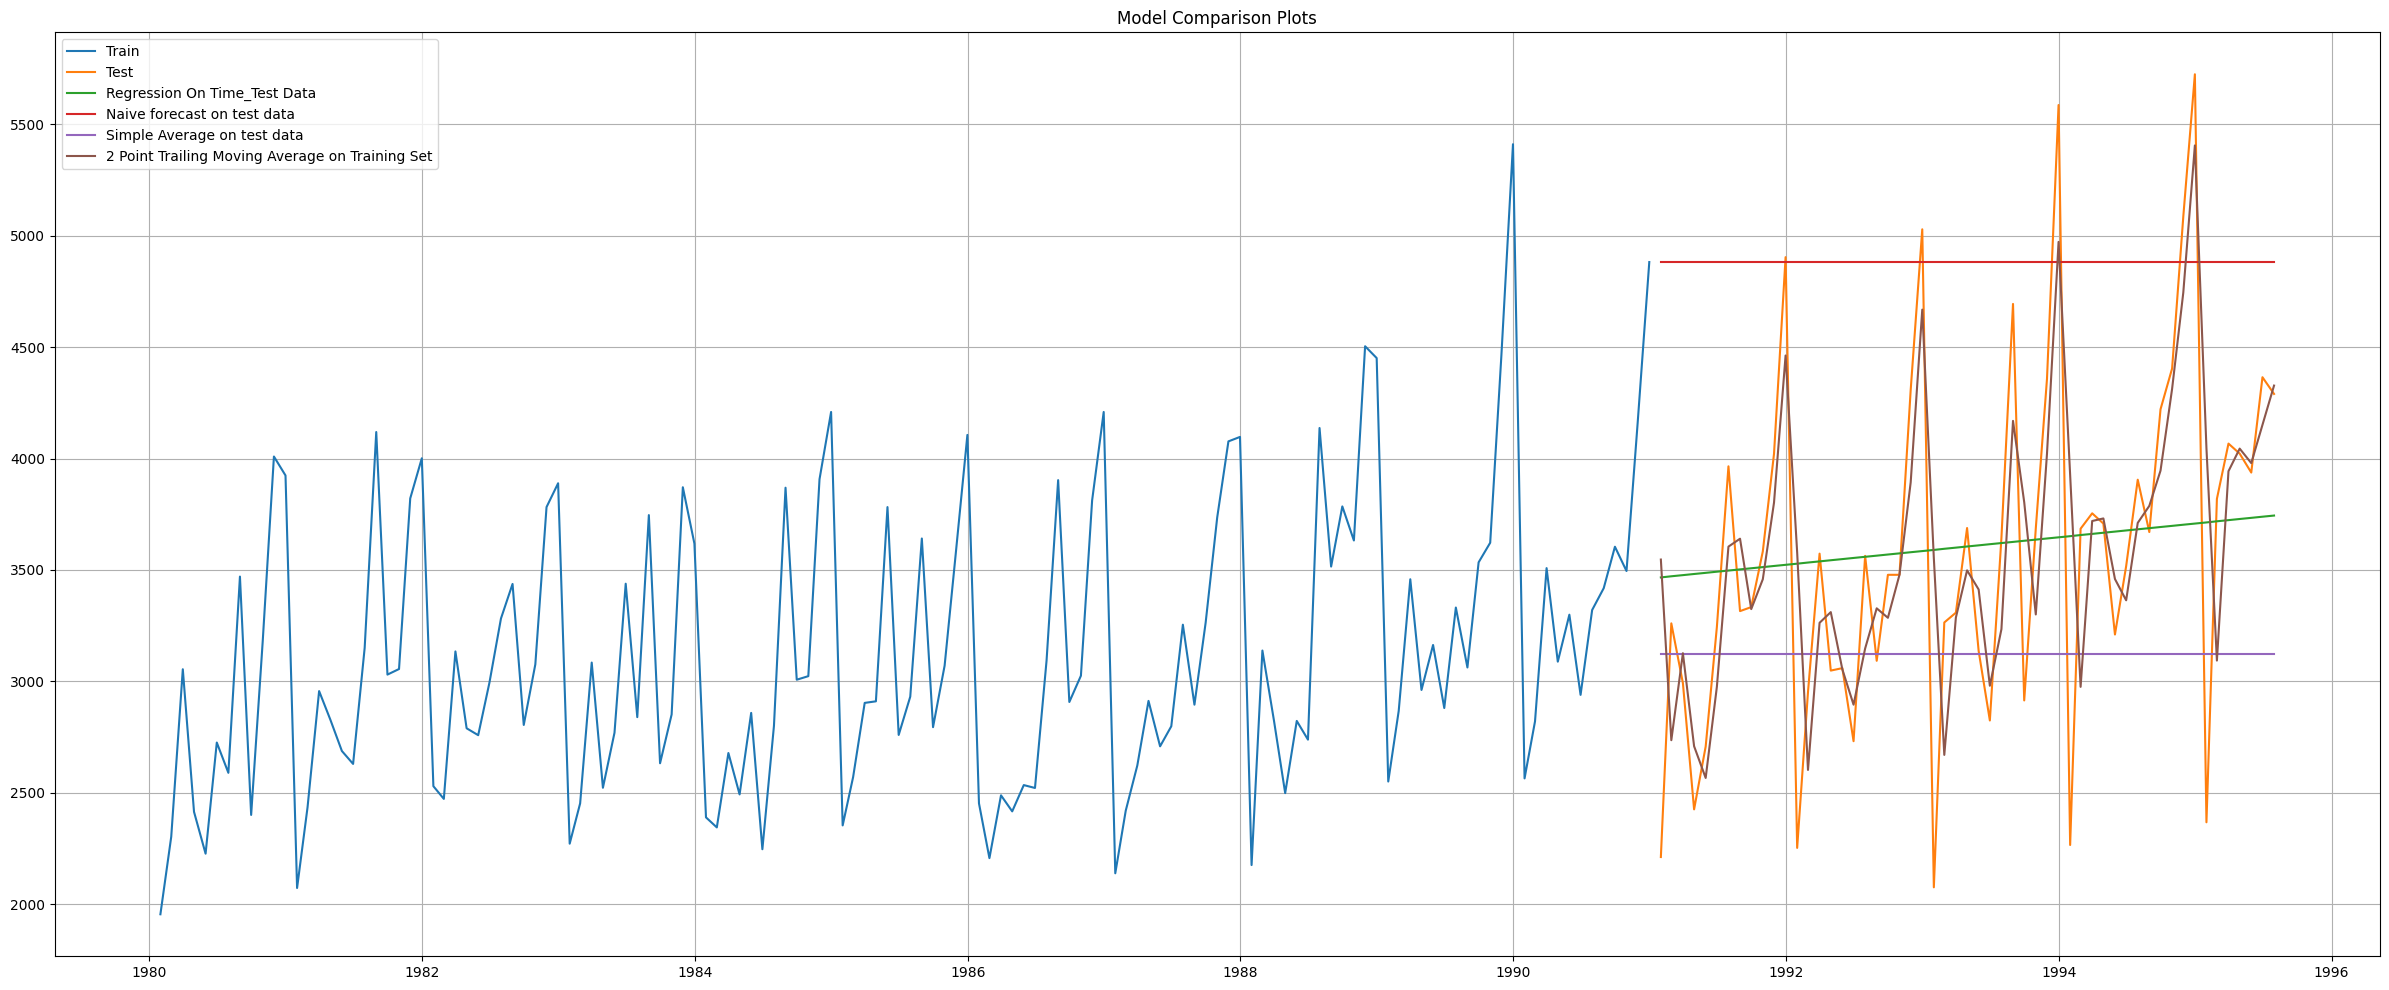

In [54]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label= 'Naive forecast on test data')
plt.plot(SimpleAverage_test['mean_forecast'], label= 'Simple Average on test data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

2 points Trailing MA model is best among all we wroked out till now.

### WIll start making Exponential smoothing models for further analysis.

**Model 5:** Simple Exponential Smoothing(SES)

Now, let’s create the models based on exponential smoothing. Import the function from statsmodel, Simple Exponential smoothing takes only level in consideration for forecasting

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [56]:
#buliding SES model
SES_train = train.copy()
SES_test = test.copy()

In [57]:
# create class
model_SES = SimpleExpSmoothing(SES_train['SoftDrinkProduction'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [58]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.15727011750416564,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1954.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
# Using the fitted model on the training set to forecast on the test set
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

SoftDrinkProduction      predict
Time_Stamp                                  
1991-01-31                 2211  3736.175067
1991-02-28                 3260  3736.175067
1991-03-31                 2992  3736.175067
1991-04-30                 2425  3736.175067
1991-05-31                 2707  3736.175067

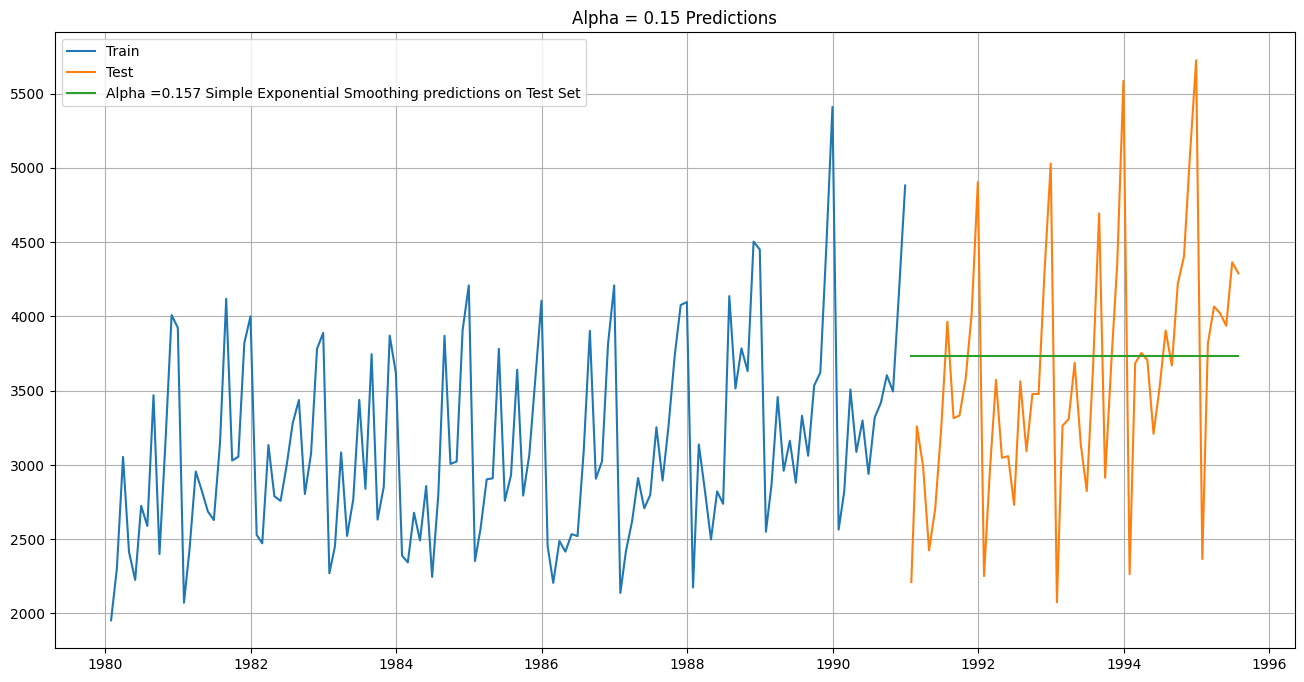

In [61]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(16,8))
plt.plot(SES_train['SoftDrinkProduction'], label='Train')
plt.plot(SES_test['SoftDrinkProduction'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.157 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.15 Predictions');

As noticed even SES have not performed well, lets do RMSE check on SES and also compare it with other models.


In [62]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['SoftDrinkProduction'],SES_test['predict'],squared=False)
print("For Alpha =0.157 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.157 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 819.401


In [63]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.157,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         775.807810
NaiveModel                              1519.259233
SimpleAverageModel                       934.353358
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
2pointTrailingMovingAverage              556.725418
4pointTrailingMovingAverage              687.181726
6pointTrailingMovingAverage              710.513877
9pointTrailingMovingAverage              735.889827
Alpha=0.157,SimpleExponentialSmoothing   819.401216

RMSE for SES have come as 819.40

**Model 6**: Double Exponential Smoothing (Holt's Model)

In [64]:
DES_train = train.copy()
DES_test = test.copy()

Building a model on train set.

In [65]:
model_DES = Holt(DES_train['SoftDrinkProduction'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [66]:
##  will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [67]:
for i in np.arange(0.3,1.1,0.1):
  for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_train['SoftDrinkProduction'],DES_train['predict',i,j],squared=False)

        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

<ipython-input-67-4f6547d18af2>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-67-4f6547d18af2>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-67-4f6547d18af2>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-67-4f6547d18af2>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsD

### Model Evaluation

In [68]:
resultsDf_6

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.3          0.3   734.358128   734.358128
1            0.3          0.4   764.758634   764.758634
2            0.3          0.5   795.818575   795.818575
3            0.3          0.6   823.235298   823.235298
4            0.3          0.7   842.633949   842.633949
..           ...          ...          ...          ...
59           1.0          0.6   966.636686   966.636686
60           1.0          0.7  1011.096621  1011.096621
61           1.0          0.8  1057.472273  1057.472273
62           1.0          0.9  1106.076606  1106.076606
63           1.0          1.0  1157.631749  1157.631749

[64 rows x 4 columns]

In [69]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3  734.358128  734.358128
8            0.4          0.3  738.383045  738.383045
16           0.5          0.3  741.869941  741.869941
24           0.6          0.3  752.532546  752.532546
17           0.5          0.4  761.972248  761.972248

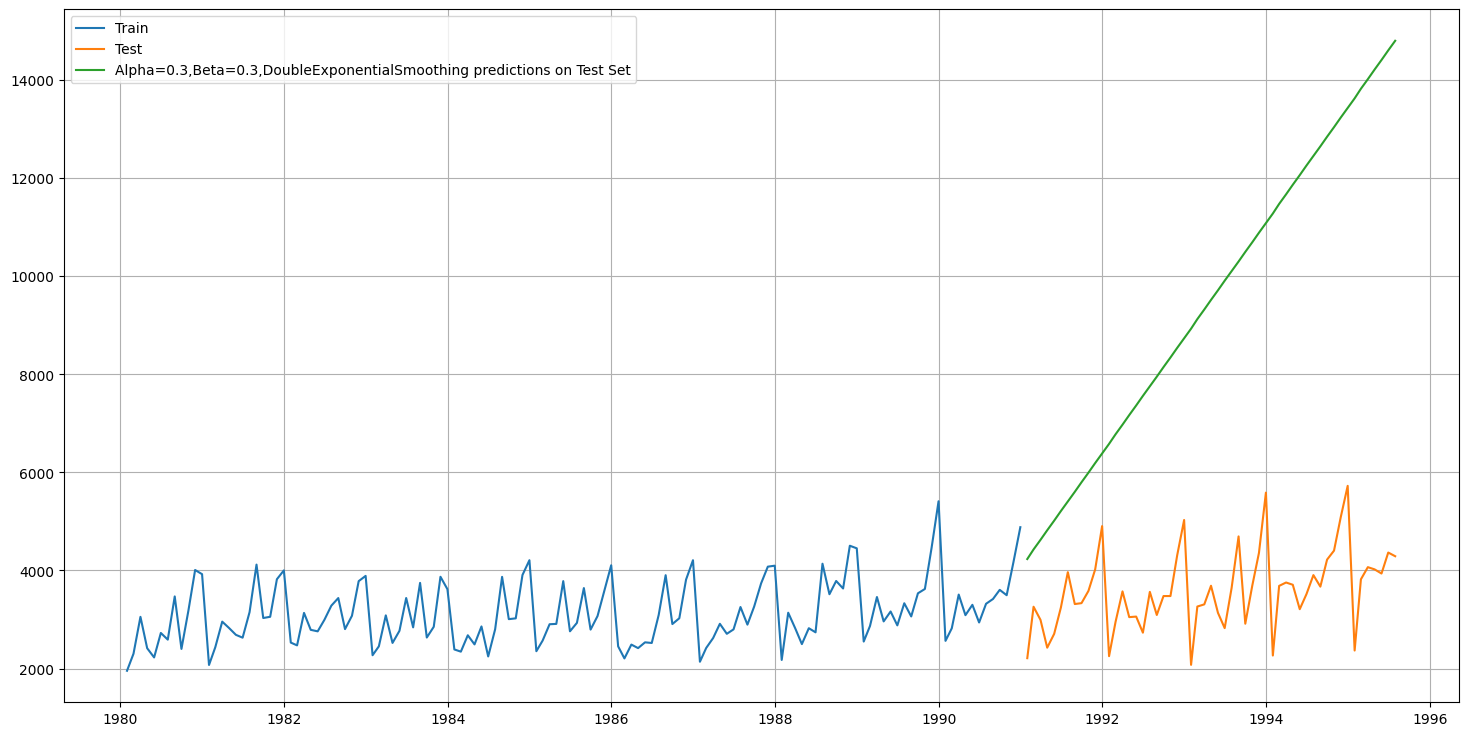

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['SoftDrinkProduction'], label='Train')
plt.plot(DES_test['SoftDrinkProduction'], label='Test')

plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [71]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                775.807810
NaiveModel                                     1519.259233
SimpleAverageModel                              934.353358
2pointTrailingMovingAverage                     556.725418
4pointTrailingMovingAverage                     687.181726
6pointTrailingMovingAverage                     710.513877
9pointTrailingMovingAverage                     735.889827
2pointTrailingMovingAverage                     556.725418
4pointTrailingMovingAverage                     687.181726
6pointTrailingMovingAverage                     710.513877
9pointTrailingMovingAverage                     735.889827
Alpha=0.157,SimpleExponentialSmoothing          819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing   734.358128

Though the RMSE for DES model has come little lower but the model still did not come up so well. Will make TES model ahead.

**Model 7:** Triple Exponential Smoothing (Holt - Winter's Model)

This Method takes Level, Trend and Seasonality in consideration.
Call in the function and find the best parameters for Alpha, Beta and Gamma

In [72]:
TES_train = train.copy()
TES_test = test.copy()

In [73]:
#building TES model
model_TES = ExponentialSmoothing(TES_train['SoftDrinkProduction'], trend='additive',seasonal='multiplicative',initialization_method='estimated')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [74]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python chose for the model.

In [75]:
model_TES_autofit.params

{'smoothing_level': 0.11109431519592447,
 'smoothing_trend': 0.049376826867578195,
 'smoothing_seasonal': 0.23045135049306534,
 'damping_trend': nan,
 'initial_level': 2803.2031192879085,
 'initial_trend': 15.090789924689997,
 'initial_seasons': array([0.81675206, 0.85707329, 1.03845496, 0.9260439 , 0.95069866,
        0.97315248, 1.03766339, 1.25338534, 0.99255867, 1.07376893,
        1.35052981, 1.38008798]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
# Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

SoftDrinkProduction  auto_predict
Time_Stamp                                   
1991-01-31                 2211   2569.744680
1991-02-28                 3260   2890.183186
1991-03-31                 2992   3297.975314
1991-04-30                 2425   3008.698928
1991-05-31                 2707   3215.504574

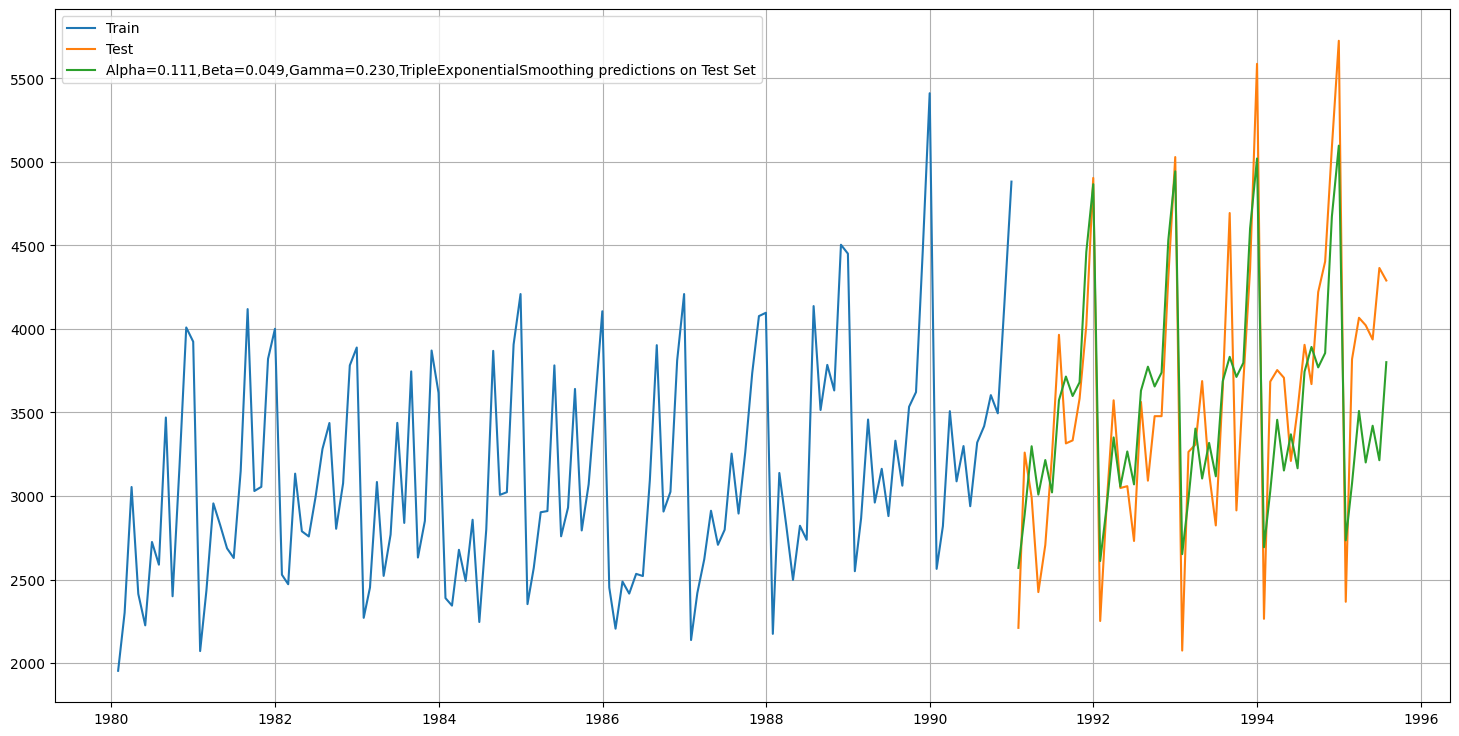

In [77]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['SoftDrinkProduction'], label='Train')
plt.plot(TES_test['SoftDrinkProduction'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.230,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

We can see the model has come up well in comparison to other models so far.

let us check the RMSE.

In [78]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['SoftDrinkProduction'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.230, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.230, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 447.623


In [79]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.157,SimpleExponentialSmoothing               819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837

TES model has given us the lowest RMSE score of 447.62 by far

**Ploting all 3 exponential models together**

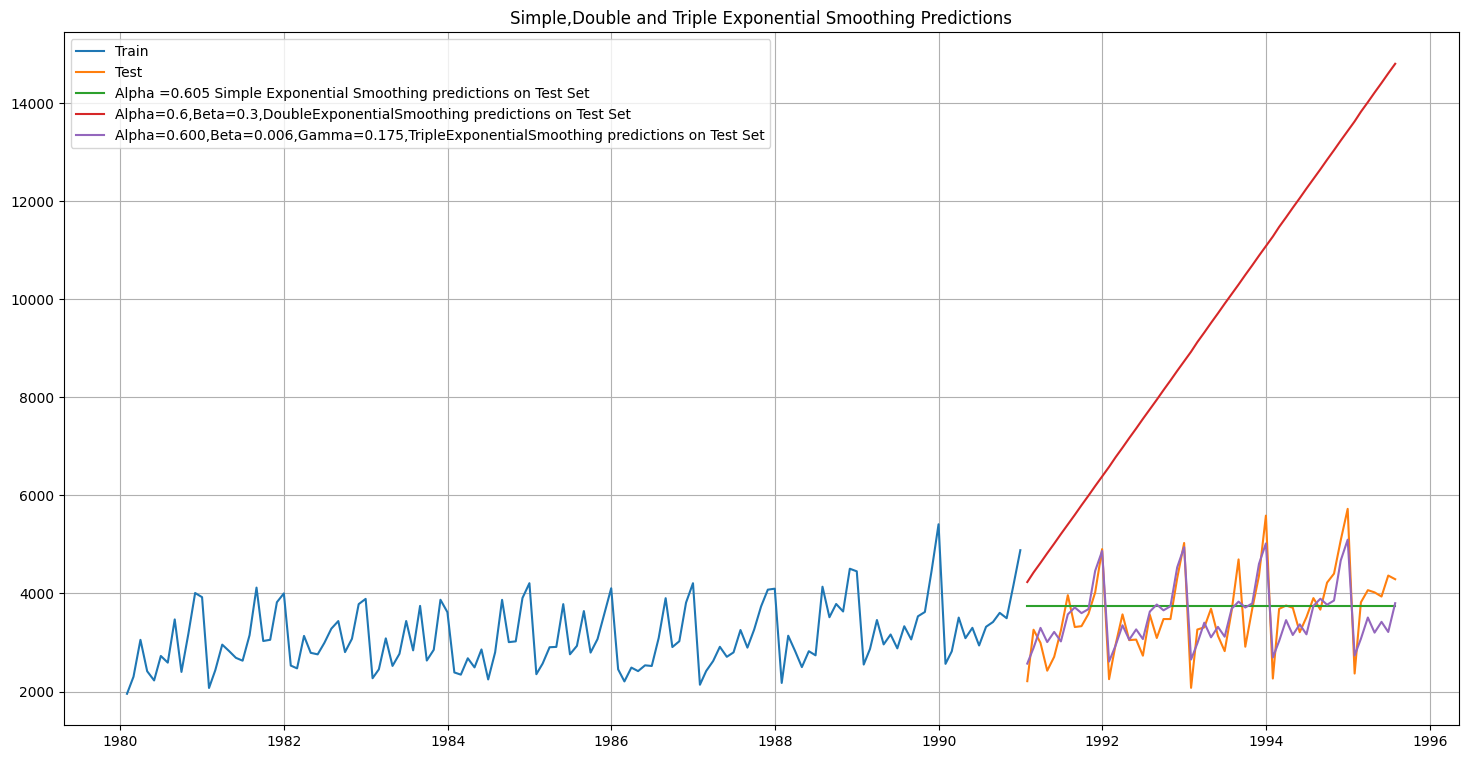

In [80]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.6,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.600,Beta=0.006,Gamma=0.175,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

**Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.**

Note: Stationarity should be checked at alpha = 0.05.

to build the Arima and Sarima Models, we need to check if the data is stationery or not. To do that we will run the test on adfuller function.

*P Value should be less than 0.05% if the data is stationary *

In [81]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

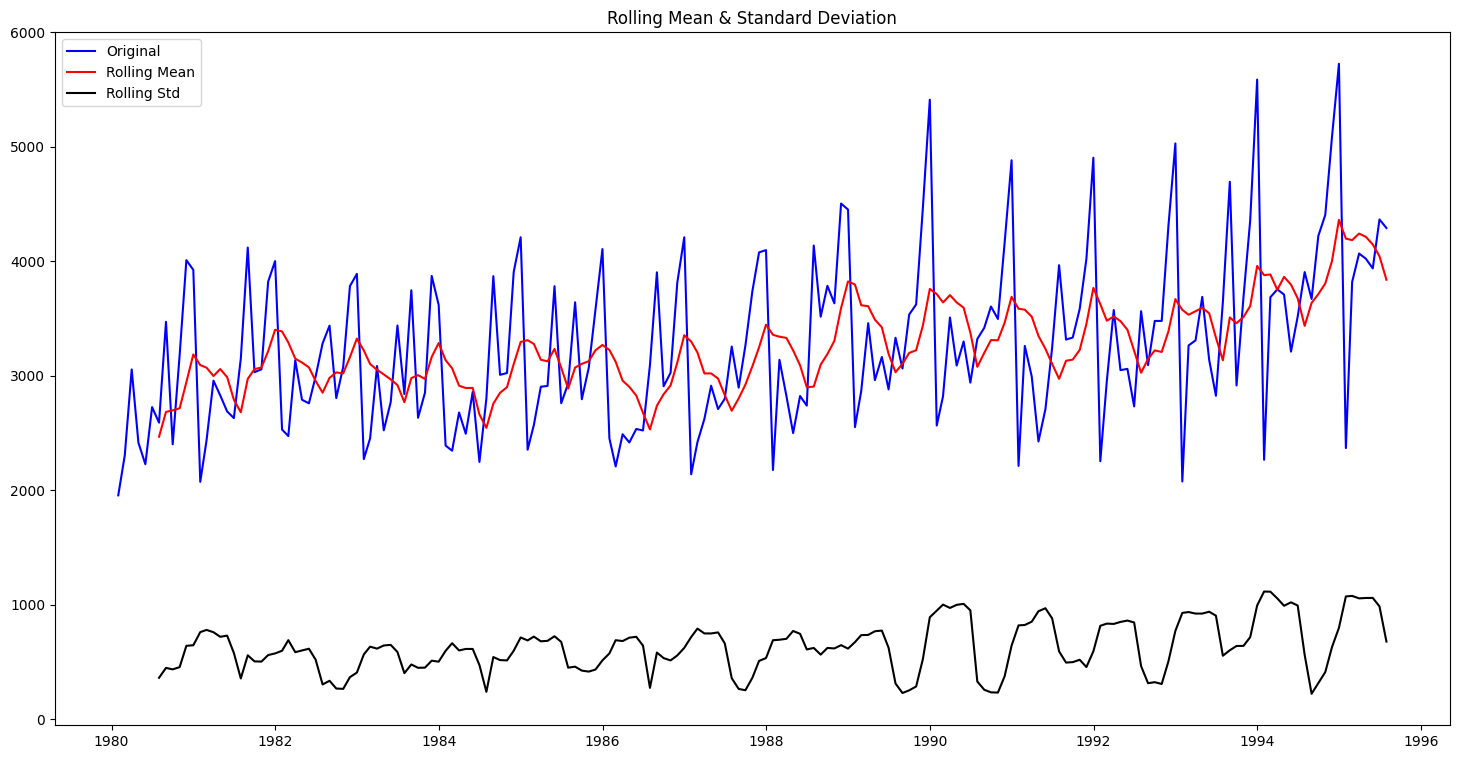

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [82]:
test_stationarity(df['SoftDrinkProduction'])

As the P value is higher than 0.05 so this time series isnt stationery.

**Let us take the difference of order 1 and check whether the Time Series is stationary or not.**

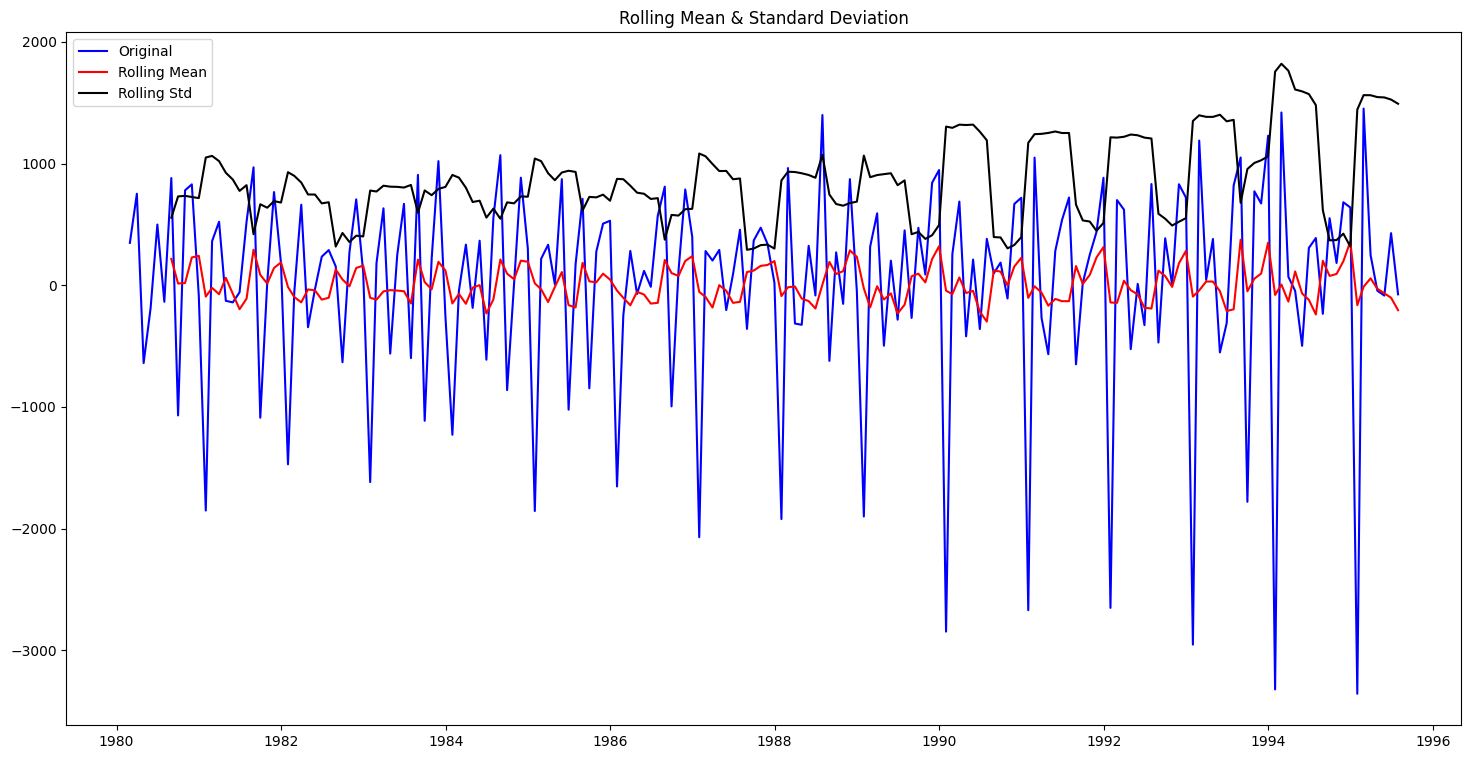

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [83]:
test_stationarity(df['SoftDrinkProduction'].diff().dropna())

As expected the time series is now stationery

**WIll make analysis on train & test data now.**

In [84]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [85]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1980-01-31                 1954
1980-02-29                 2302
1980-03-31                 3054
1980-04-30                 2414
1980-05-31                 2226

Last few rows of Training Data


SoftDrinkProduction
Time_Stamp                     
1990-08-31                 3418
1990-09-30                 3604
1990-10-31                 3495
1990-11-30                 4163
1990-12-31                 4882

First few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1991-01-31                 2211
1991-02-28                 3260
1991-03-31                 2992
1991-04-30                 2425
1991-05-31                 2707

Last few rows of Test Data


SoftDrinkProduction
Time_Stamp                     
1995-03-31                 4067
1995-04-30                 4022
1995-05-31                 3937
1995-06-30                 4365
1995-07-31                 4290

In [86]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Now we will check for stationarity of the Train Data Time Series.

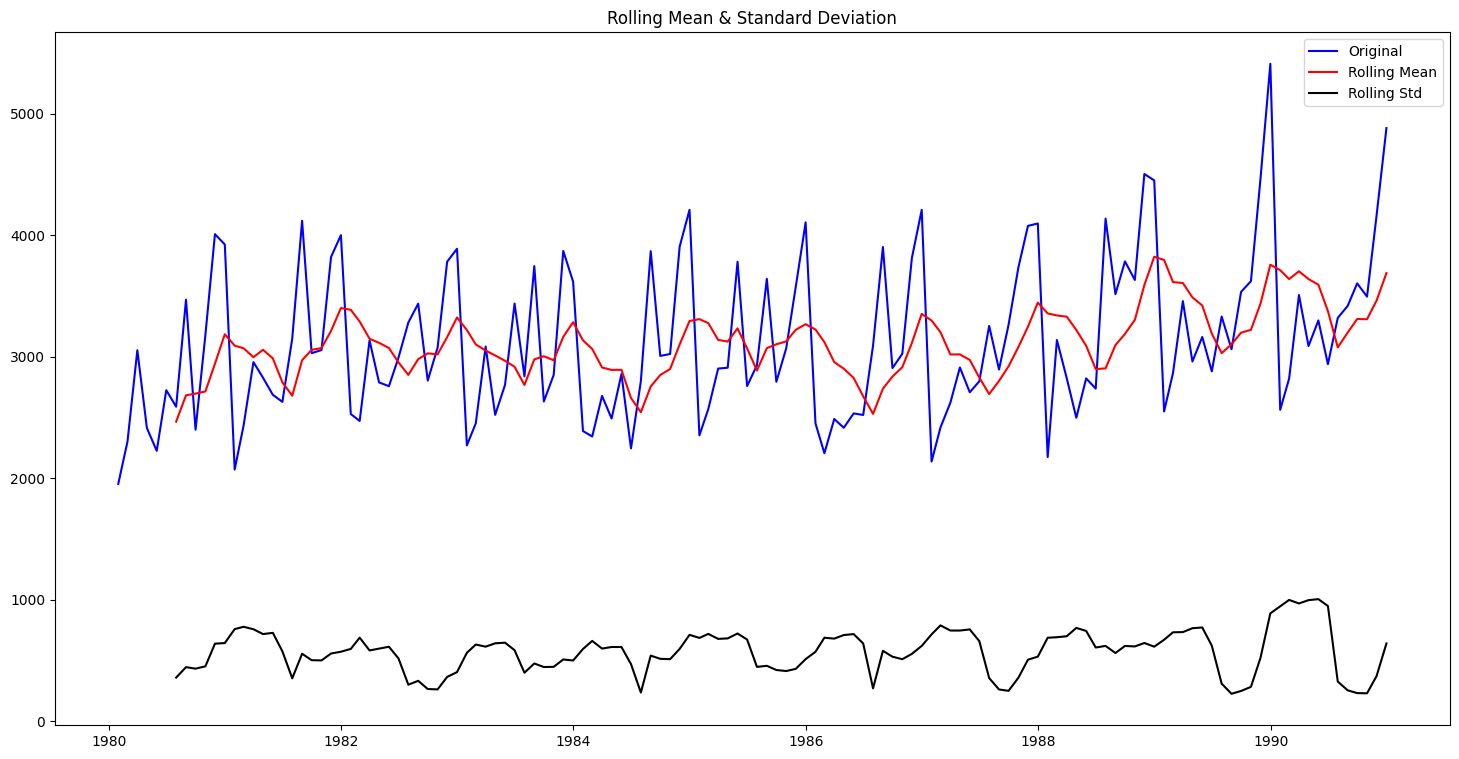

Results of Dickey-Fuller Test:
Test Statistic                  -0.990112
p-value                          0.756854
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [87]:
test_stationarity(train['SoftDrinkProduction'])

Non stationery as the P value also high.

Difference of order 1 will be used now.

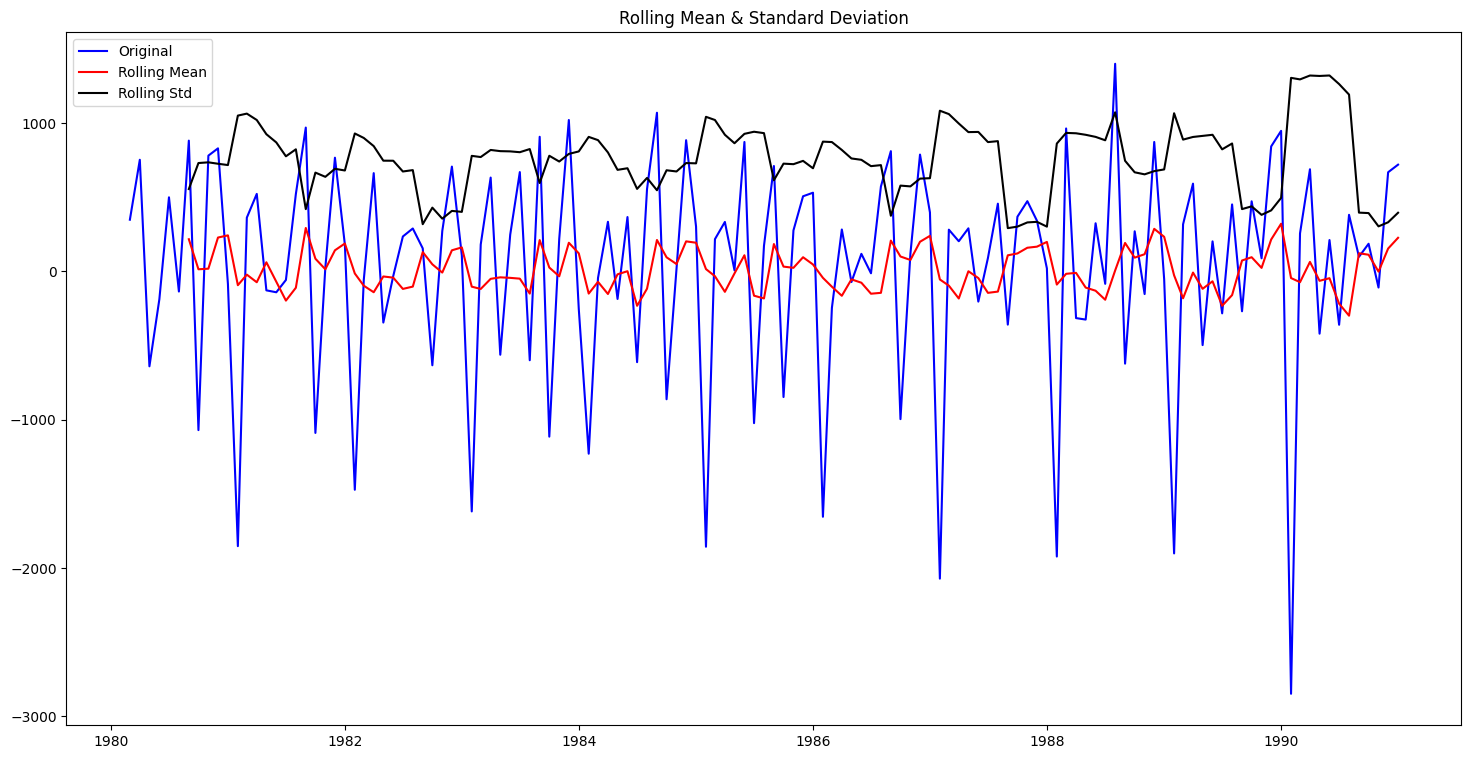

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [88]:
test_stationarity(train['SoftDrinkProduction'].diff().dropna())

Time series is now stationery

**Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

As cheked earlier, will be taking the difference of order 1, as the series is now stationary at 𝛼 = 0.05.

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

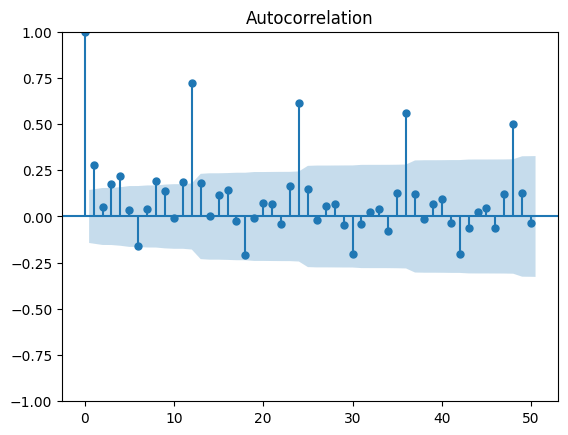

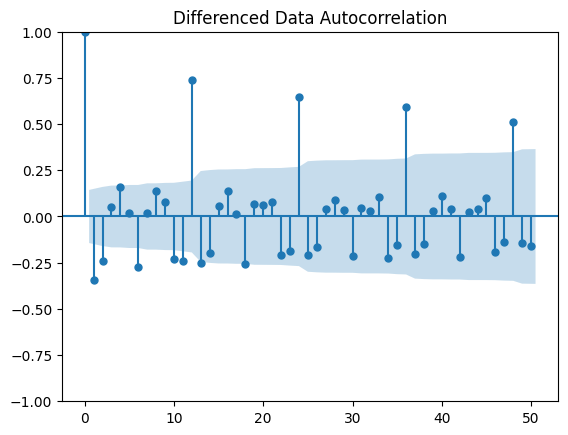

In [171]:
plot_acf(df['SoftDrinkProduction'],lags=50)
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [90]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [91]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [92]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.599630211402


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 2) - AIC:2056.4892632434903
ARIMA(1, 1, 0) - AIC:2097.872121649042


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 1) - AIC:2061.523083929782


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(1, 1, 2) - AIC:2056.715682068919
ARIMA(2, 1, 0) - AIC:2073.234860536023


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:2059.1006718133845


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2058.7127021004603


<ipython-input-92-85f9b6f28251>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [93]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  2056.489263
5  (1, 1, 2)  2056.715682
8  (2, 1, 2)  2058.712702
7  (2, 1, 1)  2059.100672
4  (1, 1, 1)  2061.523084
1  (0, 1, 1)  2069.599630
6  (2, 1, 0)  2073.234861
3  (1, 1, 0)  2097.872122
0  (0, 1, 0)  2103.733834

In [94]:
auto_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(0,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Thu, 21 Mar 2024   AIC                           2056.489
Time:                         06:21:32   BIC                           2065.115
Sample:                     01-31-1980   HQIC                          2059.994
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Predict on the Test Set using this model and evaluate the model.**

In [95]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [96]:
from sklearn.metrics import  mean_squared_error
rmse_model7_test_1 = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
print(rmse_model7_test_1)

831.6158494996555


In [97]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.157,SimpleExponentialSmoothing               819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837
ARIMA(0,1,2)                                         831.615849

THE RMSE score for Auto Arima is 831.62 which is higher

**Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.**

**Setting the seasonality as 6 to estimate parametrs using auto SARIMA model.**

In [98]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [99]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [100]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911398415
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.761913046809
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.0559370892981


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453342785
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.660005159761
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.420018961981


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.591765232491
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907402
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352388


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1785.228825915129
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1952.5333036959987


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1856.5216278749574


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1747.6522125908282
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1748.7242567779808


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1750.3434720266116


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1698.8469671831128
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2008.753008540958


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1908.9834686538607


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1760.8692609887669
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1948.9844895806627


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1844.256379408738


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1732.4311748814937


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1744.1470794814368


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1746.0690719224651


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1686.1720222262763
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2082.346293203914
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1984.6337108355488


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1829.7299079799484
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1974.880065914584


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1921.7114064457544


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1807.7742238433907
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1763.514369066262


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1761.9690920258133


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1747.766417990384
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2026.5294817474264


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1928.934533743796


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1778.3350690771201


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1932.5634100821057


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1858.3528007414302


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1748.3887290463745


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1731.1983361387968


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1733.1861019808687


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1700.3318641636665
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2006.7462276365845


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1907.8265041759005


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1761.9219326438138
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1930.0230806589602


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1844.2726723599021


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1732.031673674023


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1731.2901146764473


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1732.3468079500335


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1688.1055944804534
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2040.0704103507978
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1958.7993913063326


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1813.2902055752666
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1933.2623422645775


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1884.3081629835076


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1786.4385217507347
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1738.1081772092605


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1739.1327078689349


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1717.9018283783187
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2024.4456626381198


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1924.9693397188225


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1777.2147532519264
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1912.5130169665465


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1856.3470033909896


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1744.993138467322


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1717.983644519399


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1719.3635176893044


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1701.2328948643346


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2008.472196605966


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1908.9486128337282


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1763.921165921926


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1912.2181766642148


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1846.1807248927453


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1732.0128286409213


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1718.7161728487786


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1720.2761139789704


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1689.3722226714613


<ipython-input-100-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [101]:
#sorting the values by lowest AIC
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1686.172022
53  (1, 1, 2)  (2, 0, 2, 6)  1688.105594
80  (2, 1, 2)  (2, 0, 2, 6)  1689.372223
17  (0, 1, 1)  (2, 0, 2, 6)  1698.846967
44  (1, 1, 1)  (2, 0, 2, 6)  1700.331864

In [102]:
#lets make a summary of the model
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -836.086
Date:                           Thu, 21 Mar 2024   AIC                           1686.172
Time:                                   06:23:13   BIC                           1705.447
Sample:                                        0   HQIC                          1693.997
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7796      0.116     -6.725      0.000      -1.007      -0.552
ma.L2         -0.0866      0.094     -0.926

**Lets look at plot Diagnostics**

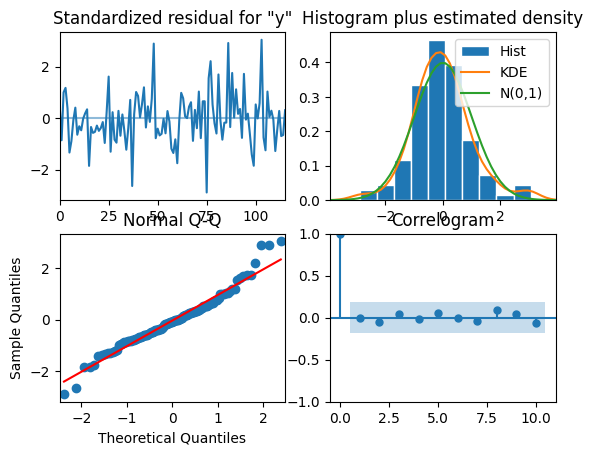

In [103]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.**

In [104]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [195]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2716.673360  318.171169    2093.069329    3340.277392
1  3110.199801  325.814866    2471.614398    3748.785204
2  3344.806166  328.583681    2700.793985    3988.818347
3  3103.976763  331.328800    2454.584247    3753.369279
4  3290.404144  334.052146    2635.673968    3945.134320

In [105]:
rmse_model8_test_1 = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_model8_test_1)

447.94260137248995


In [106]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.157,SimpleExponentialSmoothing               819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837
ARIMA(0,1,2)                                         831.615849
SARIMA(0,1,2)(2,0,2,6)                               447.942601

Triple Exponential & SARIMA has come up with lowest RMSE of 447.62 n 447.94 respectably.

As noticed, with 6 months the RMSE for Sarima model has come down to 447.94, will check with 12 months as well..

**Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.**

In [107]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [108]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [109]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1836.220093770657


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1633.5491793653493
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1789.8662806996663
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1764.6107238899406


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1591.5155744481326
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1608.648860364038


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1608.6165283979626


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1591.8014039553652
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2035.4871783907402


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1788.5369694843869


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1577.0183750724525
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1749.9824755850325


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1697.7997311033164


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1530.6914315585884


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1563.4637994170953


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1558.2120753838099


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1529.2536659271266
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2008.753008540958


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1762.3734963548918


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1560.8259136546887


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1744.333084465503


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1684.9857149264212


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1518.229380675375


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1564.296467021353


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1559.4022470471875


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1517.2079034803905
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2082.346293203914
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1830.7959380862133


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1619.1692193105584
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1762.686922670103


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1746.034454856944


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1573.3986023937134
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1575.3766146707335


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1574.3043753933498


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1572.711841137882
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2026.5294817474264


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1779.6139226872185


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1575.1200609607652


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1730.659784956743


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1699.1714026436339


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1531.8683338234753


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1546.3906446335948


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1544.971326795929


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1530.6567519848702
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2006.7462276365845


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1763.7570445188019


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1561.8449999112422


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1734.4177579735906


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1686.9458097841014


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1519.197015449037


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1548.2807767423876


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1546.500275844139


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1518.3289759796053
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2040.0704103507978
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1814.1583482027463


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1607.689201397783
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1738.250072013797


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1717.8744470685392


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1561.9021353053167


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1547.9158672872234


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1546.9578751839035


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1546.8665186645962
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2024.4456626381198


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1778.6762974897888


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1577.0337158769337


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1717.9115930478686


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1700.7853241049052


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1533.7922419997635


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1534.5085119806522


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1533.0523649506886


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1532.651498652178
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2008.472196605966


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1765.3351336094156


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1562.7584199684538


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1717.5426780771313


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1688.8418429958558


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1521.1910051344307


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1535.9388543597222


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1534.0240861517443


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1520.3136559120255


<ipython-input-109-a104e156d732>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [110]:
#sorting the AIC value
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 12)  1517.207903
23  (0, 1, 2)  (1, 0, 2, 12)  1518.229381
53  (1, 1, 2)  (2, 0, 2, 12)  1518.328976
50  (1, 1, 2)  (1, 0, 2, 12)  1519.197015
80  (2, 1, 2)  (2, 0, 2, 12)  1520.313656

In [111]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Thu, 21 Mar 2024   AIC                           1517.208
Time:                                    06:32:35   BIC                           1535.719
Sample:                                         0   HQIC                          1524.707
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9981      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

**check it on dignostic plot..**

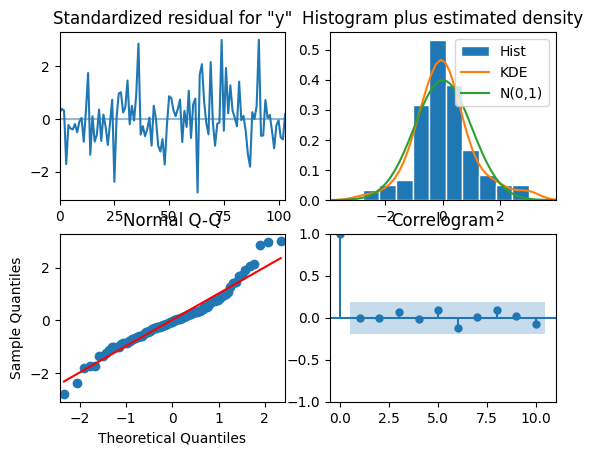

In [113]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [114]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [115]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  2657.024974  328.613832    2012.953698    3301.096251
1  2979.306635  334.136576    2324.410980    3634.202290
2  3404.286372  335.603078    2746.516426    4062.056318
3  3086.458749  337.063855    2425.825733    3747.091765
4  3284.532792  338.518355    2621.049008    3948.016576

In [116]:
rmse_model9_test_1 = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_model9_test_1)

437.7065531592109


In [117]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model9_test_1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.157,SimpleExponentialSmoothing               819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837
ARIMA(0,1,2)                                         831.615849
SARIMA(0,1,2)(2,0,2,6)                               447.942601
SARIMA(0,1,2)(2,0,2,12)                              437.706553

RMSE for SARIMA 12 is now the lowest at 437.70

**Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**



In [118]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model9_test_1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                     775.807810
NaiveModel                                          1519.259233
SimpleAverageModel                                   934.353358
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
9pointTrailingMovingAverage                          735.889827
Alpha=0.157,SimpleExponentialSmoothing               819.401216
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837
ARIMA(0,1,2)                                         831.615849
SARIMA(0,1,2)(2,0,2,6)                               447.942601
SARIMA(0,1,2)(2,0,2,12)                              437.706553
SARIMA(0,1,2)(2,0,2,12)                              437.706553

In [119]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
SARIMA(0,1,2)(2,0,2,12)                              437.706553
SARIMA(0,1,2)(2,0,2,12)                              437.706553
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...   447.622837
SARIMA(0,1,2)(2,0,2,6)                               447.942601
2pointTrailingMovingAverage                          556.725418
2pointTrailingMovingAverage                          556.725418
4pointTrailingMovingAverage                          687.181726
4pointTrailingMovingAverage                          687.181726
6pointTrailingMovingAverage                          710.513877
6pointTrailingMovingAverage                          710.513877
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        734.358128
9pointTrailingMovingAverage                          735.889827
9pointTrailingMovingAverage                          735.889827
RegressionOnTime                                     775.807810
Alpha=0.157,SimpleExponentialSmoothing               819.401216
ARIMA(0,1,2)                                         831.615849
SimpleAverageModel                                   934.353358
NaiveModel                                          1519.259233

**Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

As per our analysis and RMSE score, it is appropriate to chose SARIMA with 12 & tripleExponential with default alpha to make forecast on full data..

**Building the model on the Full Data with triple exponential Smoothing.**

In [120]:
full_data_model1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.111,
                                                                 smoothing_trend=0.049,
                                                                 smoothing_seasonal=0.230)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [121]:
RMSE_full_data_model1 = metrics.mean_squared_error(df['SoftDrinkProduction'],full_data_model1.fittedvalues,squared=False)

print('RMSE:',RMSE_full_data_model1)

RMSE: 333.471077684034


In [122]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = full_data_model1.forecast(steps=12)

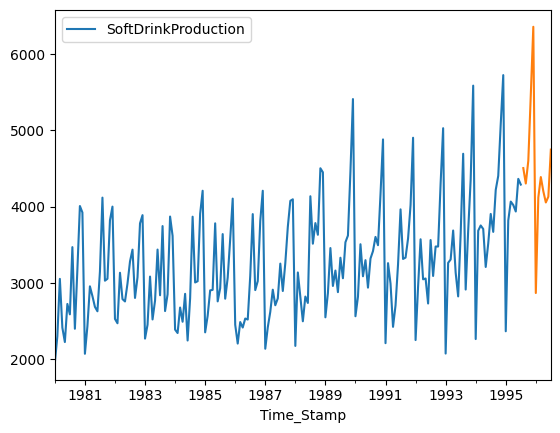

In [123]:
df.plot()
prediction_1.plot();

In [124]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(full_data_model1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(full_data_model1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-31  3851.467097  4506.118588  5160.770079
1995-09-30  3649.315240  4303.966731  4958.618222
1995-10-31  3946.991594  4601.643085  5256.294576
1995-11-30  4816.844083  5471.495574  6126.147065
1995-12-31  5703.777992  6358.429483  7013.080974

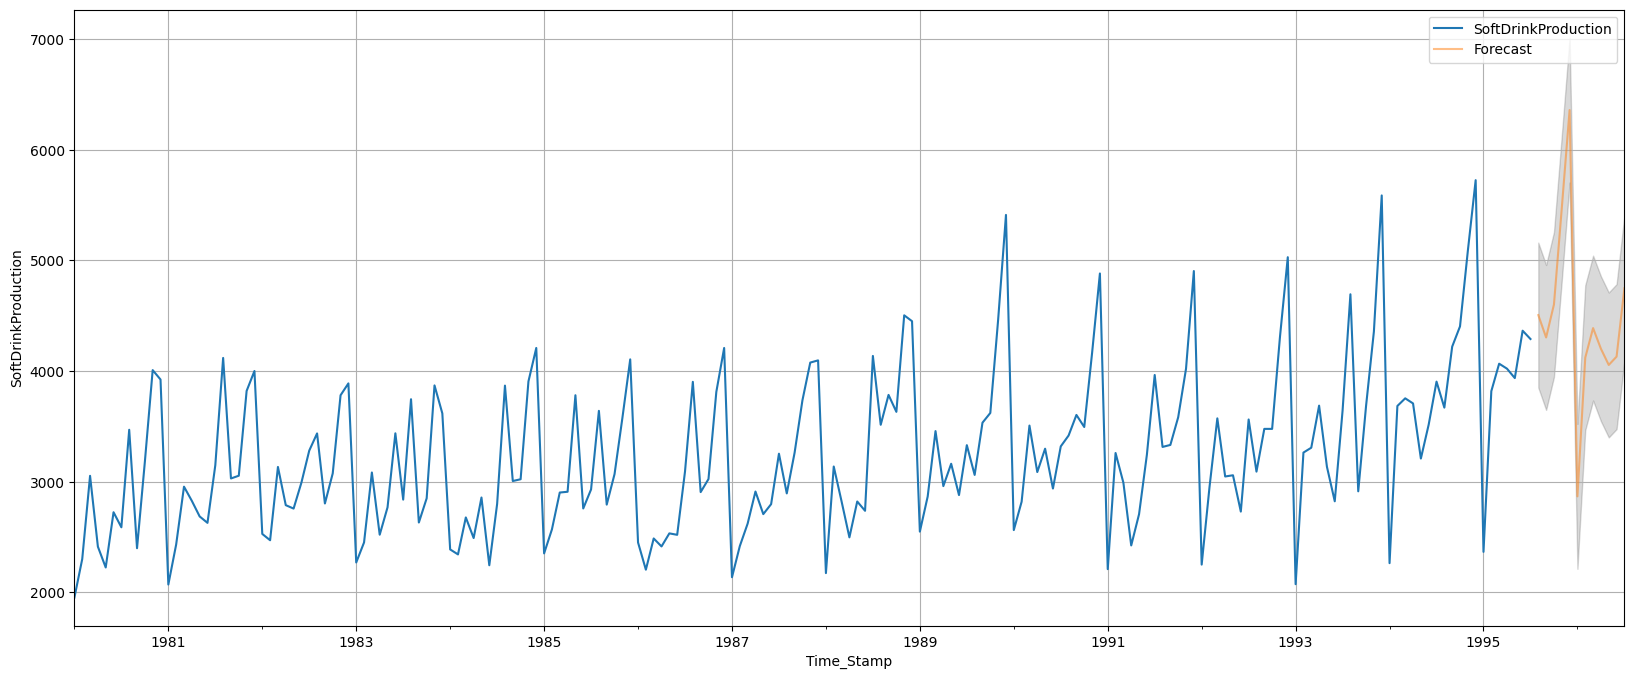

In [125]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(20,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid()
plt.show()

**Building the model on the Full Data with SARIMA.**

In [126]:
full_data_model = sm.tsa.statespace.SARIMAX(df['SoftDrinkProduction'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1157.048
Date:                            Thu, 21 Mar 2024   AIC                           2328.097
Time:                                    06:41:01   BIC                           2349.579
Sample:                                01-31-1980   HQIC                          2336.821
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9057      0.078    -11.656      0.000      -1.058      -0.753
ma.L2          0.0560      0.080   

**Lets look it at Dignostic plot**

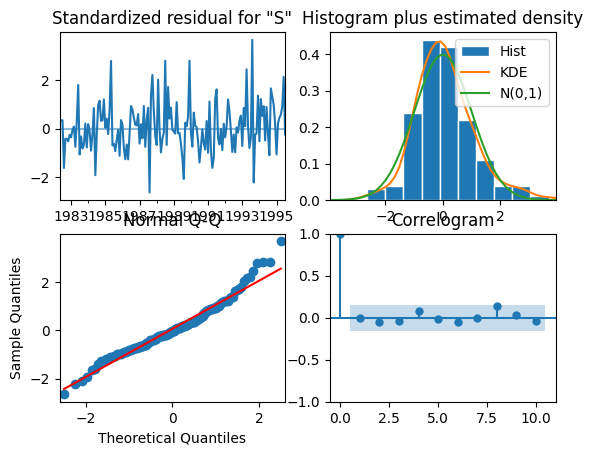

In [127]:
results_full_data_model.plot_diagnostics();

In [128]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [129]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(12)

SoftDrinkProduction         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31           4498.302173  347.025781    3818.144141    5178.460206
1995-09-30           4212.309314  348.564443    3529.135559    4895.483069
1995-10-31           4523.549222  352.443541    3832.772575    5214.325868
1995-11-30           5232.882835  356.280406    4534.586071    5931.179600
1995-12-31           6083.149256  360.076392    5377.412496    6788.886015
1996-01-31           2941.722057  363.832773    2228.622926    3654.821188
1996-02-29           4143.219356  367.550764    3422.833095    4863.605617
1996-03-31           4346.183032  371.231479    3618.582702    5073.783361
1996-04-30           4240.529355  374.876091    3505.785717    4975.272993
1996-05-31           4034.307322  378.485613    3292.489153    4776.125492
1996-06-30           4166.941279  382.061034    3418.115412    4915.767147
1996-07-31           4596.999154  385.603309    3841.230556    5352.767752

In [130]:
rmse = mean_squared_error(df['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 435.05583163026773


In [131]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

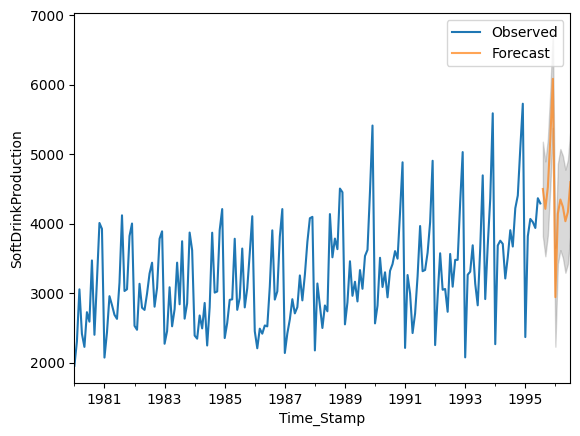

In [132]:
# plot the forecast along with the confidence band

axis = df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'],
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Time_Stamp')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.show()

**Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.**

**Based on the above data and exercise we can conclude the following:-**

* There is upward trend of sales across years overall, however, some months with lowest production  is there as well.

* Soft drink production goes high starting OCT till DEC every year, must be because of holidays time around.
* Months like JAN, MAR, APR, MAY and JUN are lowest  production , which needs proper attention.
* Production is some years went down, must be due to low selling or demand, analysing those times can give some more insight.
* A proper business plan targeting peak and lean period can help in increasing demand, resulting increase in production.
* Summer should have more demand considering soft drink consumption remains high across the globe, may we can have more focus there as well.
* Further analysis  can be made based on the selling network and about pricing.
* Need to establish the exact reason behind low production, is it due to less demand or other factors like staff shortage ect






.